In [600]:
import pandas as pd
import matplotlib.pyplot as plt

In [601]:
df = pd.read_csv("customer_churn_data.csv")

In [602]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [603]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [604]:
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [605]:
df["InternetService"] = df["InternetService"].fillna("")

In [606]:
df.isna().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [607]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [608]:
df.duplicated().sum()

0

In [609]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [610]:
numeric_columns_data = df.select_dtypes(include=["number"])
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [611]:
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,,4465.56,No,Yes


<function matplotlib.pyplot.show(close=None, block=None)>

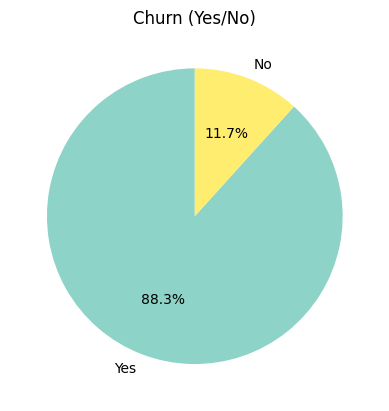

In [612]:
df["Churn"].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=90, cmap="Set3")
plt.title("Churn (Yes/No)")
plt.ylabel("")  
plt.show

In [613]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [614]:
df.groupby(["Churn", "Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [615]:
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [616]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [617]:
df.groupby("Churn")["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

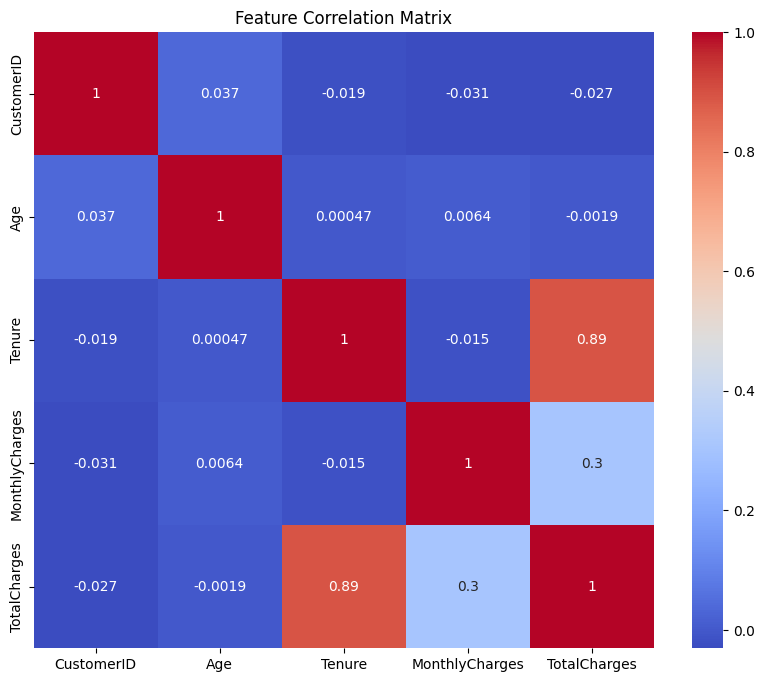

In [618]:
numeric_columns_data = df.select_dtypes(include=["number"])
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns_data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

Text(0.5, 1.0, 'Contract Type Average Price')

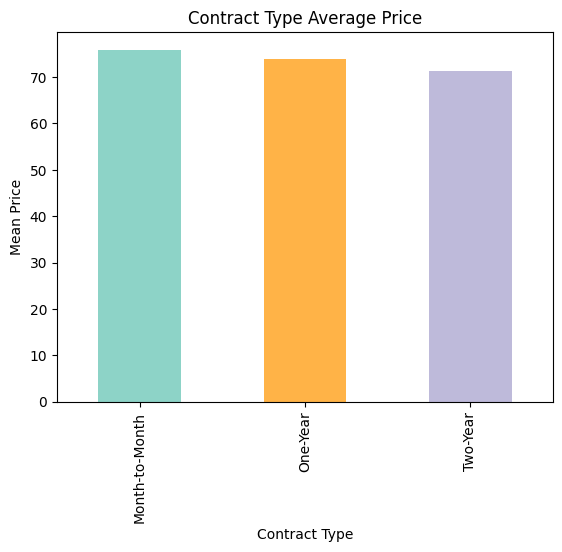

In [619]:
colors = ["#8DD3C7", "#FFB347", "#BEBADA"]  

df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar", color=colors)

# Labels and title
plt.ylabel("Mean Price")
plt.xlabel("Contract Type")
plt.title("Contract Type Average Price")

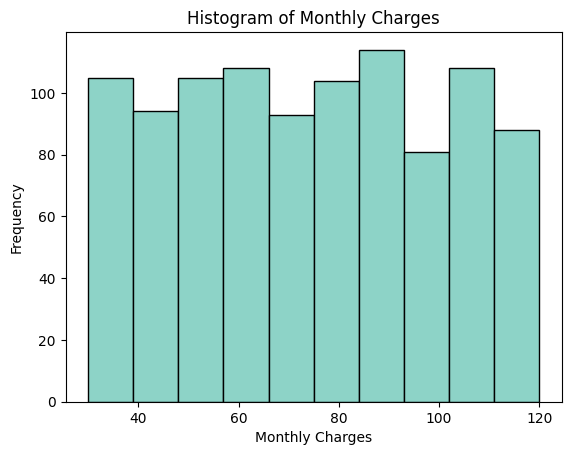

In [620]:
plt.hist(df["MonthlyCharges"], color= "#8DD3C7", edgecolor="black")
plt.title("Histogram of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()

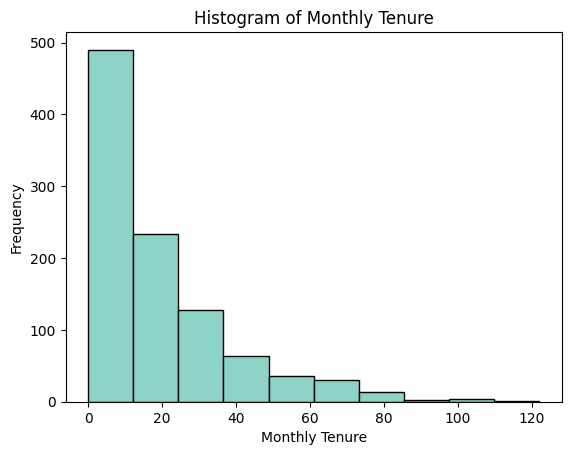

In [621]:
plt.hist(df["Tenure"], color= "#8DD3C7", edgecolor="black")
plt.title("Histogram of Monthly Tenure")
plt.xlabel("Monthly Tenure")
plt.ylabel("Frequency")
plt.show()


In [622]:
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,,4465.56,No,Yes


In [623]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [624]:
df.head(1)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes


In [625]:
y = df[["Churn"]]
X = df[["Age", "Gender", "Tenure", "MonthlyCharges"]]

In [626]:
X #1 for Female 0 for Male 

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [627]:
X["Gender"] = X["Gender"].apply(lambda x: 1 if x == "Female" else 0)

In [628]:
X.head(10)

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
5,42,1,16,119.75
6,60,0,14,80.32
7,52,1,6,58.90
8,40,1,53,49.81
9,50,1,10,61.55


In [629]:
type(X["Gender"][0])

numpy.int64

In [630]:
y["Churn"] = y["Churn"].apply(lambda x: 1 if x=="Yes" else 0)

In [631]:
type(y["Churn"][0])

numpy.int64

In [632]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [633]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [634]:
from sklearn.preprocessing import StandardScaler

In [635]:
scaler = StandardScaler()

In [636]:
X_train = scaler.fit_transform(X_train.values)

In [637]:
import joblib 
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [638]:
X_test = scaler.transform(X_test.values)

In [639]:
from sklearn.metrics import accuracy_score

def modelperformance(predictions):
    print(f"Accuracy score on model is {accuracy_score(y_test, predictions)}")

In [640]:
from sklearn.model_selection import GridSearchCV

In [641]:
from sklearn.linear_model import LogisticRegression

In [642]:
log_model = LogisticRegression()

In [643]:
import warnings
warnings.filterwarnings("ignore")

In [644]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [645]:
y_pred = log_model.predict(X_test)

In [646]:
modelperformance(y_pred)

Accuracy score on model is 0.88


In [647]:
from sklearn.neighbors import KNeighborsClassifier

In [648]:
param_grid = {
    "n_neighbors": [3,5,7,9],
    "weights": ["uniform", "distance"]
}

In [649]:
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

In [650]:
gridkn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [651]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [652]:
y_pred = gridkn.predict(X_test)

In [653]:
modelperformance(y_pred)

Accuracy score on model is 0.87


In [654]:
from sklearn.svm import SVC


In [655]:
svm = SVC()

In [656]:
param_grid = {
    "C": [0.01,0.1,0.5,1],
    "kernel": ["linear", "rbf","poly"]
}

In [657]:
gridsvc = GridSearchCV(svm, param_grid, cv=5)

In [658]:
gridsvc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [659]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [660]:
y_pred = gridsvc.predict(X_test)

In [661]:
modelperformance(y_pred)

Accuracy score on model is 0.885


In [662]:
from sklearn.tree import DecisionTreeClassifier

In [663]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

In [664]:
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

In [665]:
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [666]:
grid_tree.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'random'}

In [667]:
y_pred = grid_tree.predict(X_test)

In [668]:
modelperformance(y_pred)

Accuracy score on model is 0.85


In [669]:
from sklearn.ensemble import RandomForestClassifier

In [670]:
rfc_model = RandomForestClassifier()

In [671]:
param_grid = {
    "n_estimators": [32, 64, 128, 256],
    "max_features": [2,3,4],
    "bootstrap": [True, False]
}

In [672]:
grid_rfc = GridSearchCV(rfc_model, param_grid, cv=5)

In [673]:
grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [674]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 256}

In [675]:
y_pred = grid_rfc.predict(X_test)

In [676]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [677]:
def evaluate_model(y_true, y_pred, model_name):

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    return {"Model": model_name, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}

In [678]:
log_metrics = evaluate_model(y_test, log_model.predict(X_test), "Logistic Regression")
knn_metrics = evaluate_model(y_test, gridkn.predict(X_test), "K-Nearest Neighbors")
svm_metrics = evaluate_model(y_test, gridsvc.predict(X_test), "Support Vector Machine")
tree_metrics = evaluate_model(y_test, grid_tree.predict(X_test), "Decision Tree")
rf_metrics = evaluate_model(y_test, grid_rfc.predict(X_test), "Random Forest")

In [679]:
metrics_summary = pd.DataFrame([log_metrics, knn_metrics, svm_metrics, tree_metrics, rf_metrics])

print("\n--- Model Comparison Summary ---")
display(metrics_summary)


--- Model Comparison Summary ---


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.880,0.888325,0.988701,0.935829
1,K-Nearest Neighbors,0.870,0.887179,0.977401,0.930108
2,Support Vector Machine,0.885,0.885000,1.000000,0.938992
3,Decision Tree,0.850,0.884817,0.954802,0.918478
4,Random Forest,0.870,0.891192,0.971751,0.929730


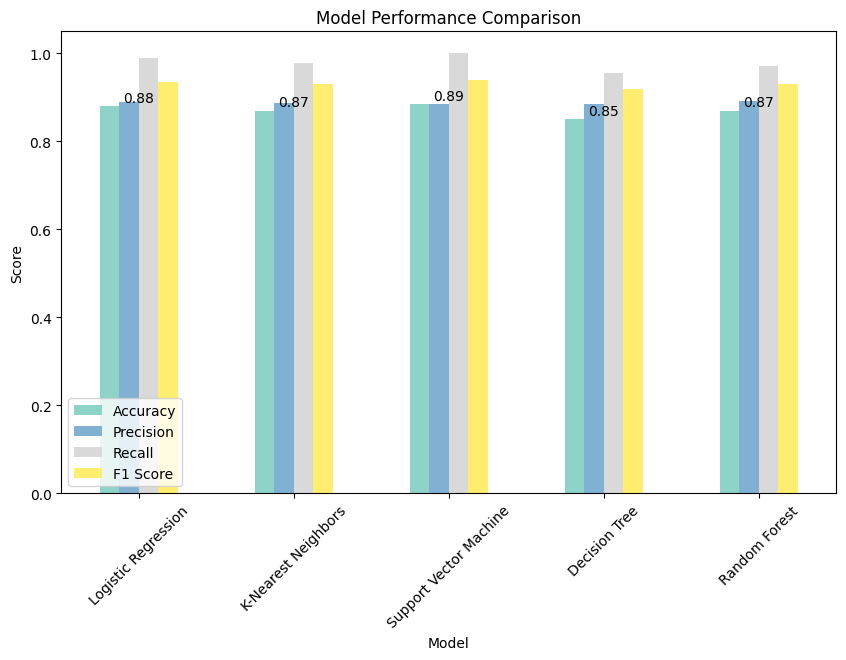

In [680]:
metrics_summary.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score"]].plot(kind="bar", figsize=(10, 6), colormap="Set3")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Model")
plt.xticks(rotation=45)

for i, v in enumerate(metrics_summary["Accuracy"]):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

plt.show()

In [681]:
best_model_name = metrics_summary.sort_values(by="Accuracy", ascending=False).iloc[0]["Model"]
print(f"Best Model: {best_model_name}")

model_mapping = {
    "Logistic Regression": log_model,
    "K-Nearest Neighbors": gridkn.best_estimator_,
    "Support Vector Machine": gridsvc.best_estimator_,
    "Decision Tree": grid_tree.best_estimator_,
    "Random Forest": grid_rfc.best_estimator_
}

best_model = model_mapping[best_model_name]
joblib.dump(best_model, "model.pkl")

Best Model: Support Vector Machine


['model.pkl']